In [23]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score




In [24]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})


In [26]:
df.head()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
df = df.drop(columns=['CustomerID', 'Gender'])


In [28]:
df = df[['Age', 'Annual Income', 'Spending Score']]
df.head()


,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

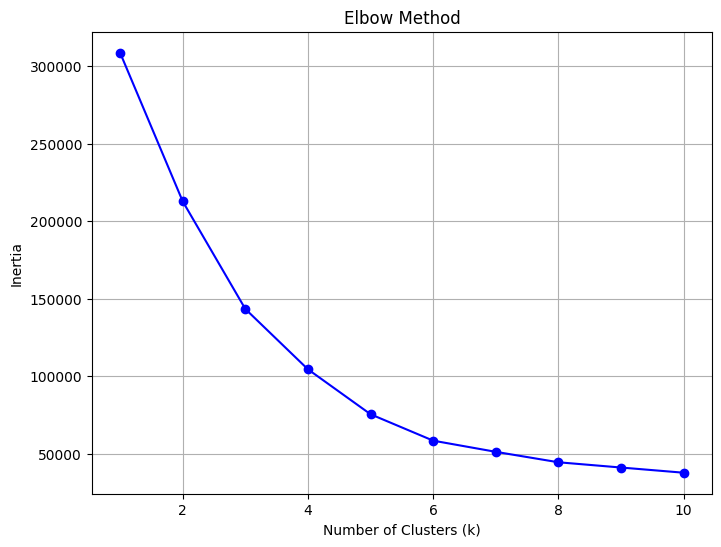

In [29]:
data = df[['Age', 'Annual Income', 'Spending Score']]
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


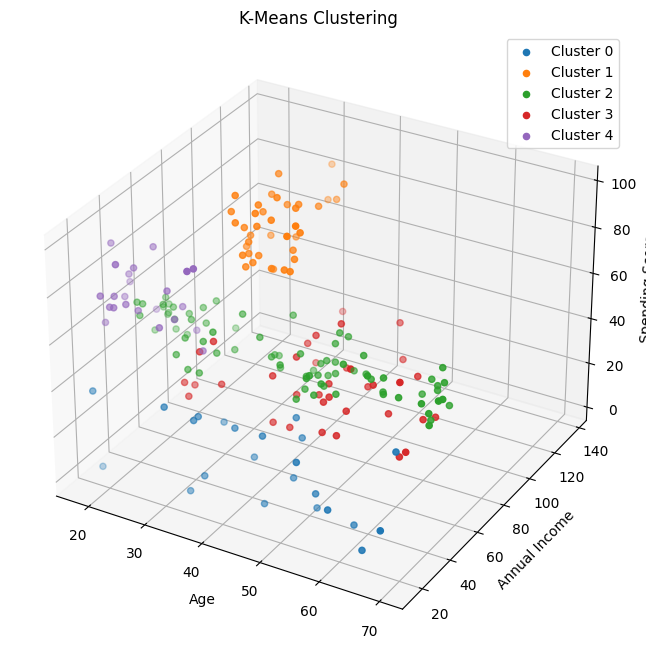

In [30]:
attributes = df[['Age', 'Annual Income', 'Spending Score']]
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(attributes)
df['label'] = labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in range(n_clusters):
    cluster = df[df['label'] == label]
    ax.scatter(cluster['Age'], cluster['Annual Income'], cluster['Spending Score'], label=f'Cluster {label}')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('K-Means Clustering')
plt.legend()
plt.show()


In [31]:
data = df[['Annual Income', 'Spending Score']].values
k_values = list(range(2, 11))
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette Score for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for K=2: 0.2968969162503008
Silhouette Score for K=3: 0.46761358158775435
Silhouette Score for K=4: 0.4931963109249047
Silhouette Score for K=5: 0.553931997444648
Silhouette Score for K=6: 0.5379675585622219
Silhouette Score for K=7: 0.5264283703685728
Silhouette Score for K=8: 0.45704384633565154
Silhouette Score for K=9: 0.4563032021725485
Silhouette Score for K=10: 0.4492169169017592


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
data = df[['Annual Income', 'Spending Score']].values
k_values = list(range(2, 11))
davies_bouldin_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    davies_bouldin_avg = davies_bouldin_score(data, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)
for k, score in zip(k_values, davies_bouldin_scores):
    print(f"Davies-Bouldin Index for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for K=2: 1.256774385118528
Davies-Bouldin Index for K=3: 0.715276820248462
Davies-Bouldin Index for K=4: 0.7103644068779904
Davies-Bouldin Index for K=5: 0.5725628995597082
Davies-Bouldin Index for K=6: 0.6588591430377733
Davies-Bouldin Index for K=7: 0.7203751347918687
Davies-Bouldin Index for K=8: 0.7615185062854057
Davies-Bouldin Index for K=9: 0.7534534957493407
Davies-Bouldin Index for K=10: 0.7179041164888543


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Ambil data dari DataFrame Anda (pastikan Anda sudah membaca datanya sebelumnya)
# Misalkan Anda menyimpannya dalam DataFrame df

# Data yang digunakan untuk clustering (misalnya, hanya kolom Annual Income dan Spending Score)
data = df[['Annual Income', 'Spending Score']].values

# Daftar nilai K yang ingin diuji
k_values = list(range(2, 11))

# Inisialisasi list untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = []

# Melakukan iterasi untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    calinski_harabasz_avg = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Menampilkan hasil
for k, score in zip(k_values, calinski_harabasz_scores):
    print(f"Calinski-Harabasz Index for K={k}: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for K=2: 96.74654578369159
Calinski-Harabasz Index for K=3: 151.5570090006799
Calinski-Harabasz Index for K=4: 174.0644335433684
Calinski-Harabasz Index for K=5: 247.35899338037282
Calinski-Harabasz Index for K=6: 242.29567848269156
Calinski-Harabasz Index for K=7: 254.8292427882858
Calinski-Harabasz Index for K=8: 267.64986334934235
Calinski-Harabasz Index for K=9: 271.3971330761246
Calinski-Harabasz Index for K=10: 253.74507689907577


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
